<a href="https://colab.research.google.com/github/mazibazi/dataScienceGeo/blob/main/dealingWithNull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import Lib and File

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error

In [ ]:
path = '/content/gdrive/MyDrive/Colab Notebooks/dataAnalySPT/datasetSelectedLine4SoilPro.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Code,DepthUp,DepthDown,Soil,Density,qu,Cu_directshear,Phi_directshear,Cu_triaxial,Phi_triaxial,Cu,Phi,Nspt,Address,Latitude,Longitude
0,0,S1_TI-2C,2.0,2.6,Filling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Av. Reina Mercedes,37.36079,-5.988427
1,1,S1_TI-2C,9.0,9.6,Clay,1.818,NaN,0.49,23.0,NaN,NaN,0.49,23.00,20.0,Av. Reina Mercedes,37.36079,-5.988427
2,2,S1_TI-2C,23.5,24.1,Sand,2.006,2.35,NaN,NaN,0.20,30.31,0.20,30.31,31.0,Av. Reina Mercedes,37.36079,-5.988427
3,3,S1_TI-2C,29.5,30.1,Sand,2.050,NaN,0.47,23.5,NaN,NaN,0.47,23.50,NaN,Av. Reina Mercedes,37.36079,-5.988427
4,4,S1_TI-2C,40.0,40.6,Marl,2.102,NaN,NaN,NaN,0.44,20.10,0.44,20.10,NaN,Av. Reina Mercedes,37.36079,-5.988427


# Dataset rename

In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
targetSoil = ["Clay", "Sand"]
gravelSoil = {"Gravel"}
deepSoil = ["Marl"]
fillSoil = ["Filling"]

df1 = df[df["Soil"].isin(targetSoil)]
df2 = df[df["Soil"].isin(gravelSoil)]
df3 = df[df["Soil"].isin(deepSoil)]
df0 = df[df["Soil"].isin(fillSoil)]
print(f"Number of report that are located in \nfilling: {df0.shape[0]}\nClay and Sand: {df1.shape[0]}\nGravel: {df2.shape[0]} \nMarl: {df3.shape[0]}")

Number of report that are located in 
filling: 18
Clay and Sand: 55
Gravel: 15 
Marl: 41


In [ ]:
dfFirst = df1.iloc[:,[0,3,4,-4,-5,-6,-1,-2,-3]]
dfFirst.columns

Index(['Code', 'Soil', 'Density', 'Nspt', 'Phi', 'Cu', 'Longitude', 'Latitude',
       'Address'],
      dtype='object')

# Dealing with Null data

In [ ]:
dfFirst.isna().sum()

Code          0
Soil          0
Density      26
Nspt         23
Phi          26
Cu           26
Longitude     0
Latitude      0
Address       0
dtype: int64

We can see 23 Nspt and 26 Cohession are not reported, so we are going to check these data are similar or they may have cover each other. 

In [ ]:
(dfFirst.iloc[:,3].isna() & dfFirst.iloc[:,5].isna()).sum()

8

So, we have already seen these 8 data in the previouse file. And I have already checked that these SPT reports are complete in other layers. So I am going tp remove this Rows. 

In [ ]:
dfFirst[dfFirst["Nspt"].isnull() & dfFirst["Cu"].isnull()]

,Code,Soil,Density,Nspt,Phi,Cu,Longitude,Latitude,Address
43,S4_TVI-1,Clay,0.850,NaN,NaN,NaN,-6.010093,37.398565,C/ Americo Vespucio
66,S1_TVIII-1,Sand,1.868,NaN,NaN,NaN,-5.997485,37.369618,C/ Antonio Bienvenida (Feria)
81,S3_TVIII-1,Clay,1.888,NaN,NaN,NaN,-5.994372,37.364774,Puerto de Sevilla
94,S8_TVII-2,Sand,2.150,NaN,NaN,NaN,-6.009896,37.381862,Ronda Triana
100,S2_TV-2,Clay,1.840,NaN,NaN,NaN,-5.994999,37.409252,Av. Alvaro Alonso
109,S3_TV-2,Sand,2.010,NaN,NaN,NaN,-5.996847,37.409546,C/ J. Bautista Muñoz
117,S9_TVII-2,Sand,NaN,NaN,NaN,NaN,-6.005359,37.375627,C/ Santa Fe
121,S10_TVII-2,Sand,NaN,NaN,NaN,NaN,-6.008791,37.380210,Lopez de Gomara


In [ ]:
indexNull = dfFirst[dfFirst["Nspt"].isnull() & dfFirst["Cu"].isnull()].index.values
indexNull

array([ 43,  66,  81,  94, 100, 109, 117, 121])

In [ ]:
dfFirst[dfFirst["Nspt"].isnull() & dfFirst["Cu"].isnull()]["Code"].values

array(['S4_TVI-1', 'S1_TVIII-1', 'S3_TVIII-1', 'S8_TVII-2', 'S2_TV-2',
       'S3_TV-2', 'S9_TVII-2', 'S10_TVII-2'], dtype=object)

47

In [ ]:
if dfFirst.drop(indexNull).shape[0] == len(dfFirst)-len(indexNull):
  print(f"It was Right and the lenghth of new data fram is {dfFirst.drop(indexNull).shape[0]}\nAnd {len(indexNull)} are removed which {round(len(indexNull)/len(dfFirst)*100)}% of dataset is removed")
  dfDealP = dfFirst.drop(indexNull)

It was Right and the lenghth of new data fram is 47
And 8 are removed which 15% of dataset is removed


In [ ]:
dfDealP.head(3)

,Code,Soil,Density,Nspt,Phi,C1,Cu,Longitude,Latitude,Address
1,S1_TI-2C,Clay,1.818,20.0,23.00,127.4751,0.49,-5.988427,37.36079,Av. Reina Mercedes
2,S1_TI-2C,Sand,2.006,31.0,30.31,198.7991,0.20,-5.988427,37.36079,Av. Reina Mercedes
3,S1_TI-2C,Sand,2.050,NaN,23.50,NaN,0.47,-5.988427,37.36079,Av. Reina Mercedes


## Now we are going to find Soil Properties of dataset 

#### Using Formula 
[Ranjan Kumar](https://link.springer.com/article/10.1007/s41403-016-0012-6)<br>
[Mahmoud](https://www.researchgate.net/profile/Nirmala-Svsg/post/About_shear_strength_test_of_soils_what_would_be_the_most_reliable_test/attachment/59d6370279197b8077994636/AS%3A391268300541953%401470297040155/download/42.pdf)

##### Find Cohession

for range **20-30**:<br>
$C1 = -2.2049 + 6.484N$<br>
for range **10-30**:<br>
$C2 = -16.5+2.15N$ <br>
General<br>
$C3 =0.014N-0.18$ 

In [ ]:
dfDealP.insert(5,"C1", round(-2.2049+ dfDealP["Nspt"]*6.484,3))
# dfDealP.drop("C1", axis = 1, inplace=True)
dfDealP.head(5)

,Code,Soil,Density,Nspt,Phi,C1,Cu,Longitude,Latitude,Address
1,S1_TI-2C,Clay,1.818,20.0,23.00,127.475,0.49,-5.988427,37.36079,Av. Reina Mercedes
2,S1_TI-2C,Sand,2.006,31.0,30.31,198.799,0.20,-5.988427,37.36079,Av. Reina Mercedes
3,S1_TI-2C,Sand,2.050,NaN,23.50,NaN,0.47,-5.988427,37.36079,Av. Reina Mercedes
6,S1_TVII-2,Clay,2.156,10.0,23.64,62.635,0.18,-6.010817,37.39085,C/ Odiel
7,S1_TVII-2,Clay,2.063,NaN,23.14,NaN,0.52,-6.010817,37.39085,C/ Odiel


In [ ]:
dfDealP.insert(5,"C2", round(-16.5+2.15*dfDealP["Nspt"],3))
# dfDealP.drop("C2", axis = 1, inplace=True)
dfDealP.head(5)

,Code,Soil,Density,Nspt,Phi,C2,C1,Cu,Longitude,Latitude,Address
1,S1_TI-2C,Clay,1.818,20.0,23.00,26.50,127.475,0.49,-5.988427,37.36079,Av. Reina Mercedes
2,S1_TI-2C,Sand,2.006,31.0,30.31,50.15,198.799,0.20,-5.988427,37.36079,Av. Reina Mercedes
3,S1_TI-2C,Sand,2.050,NaN,23.50,NaN,NaN,0.47,-5.988427,37.36079,Av. Reina Mercedes
6,S1_TVII-2,Clay,2.156,10.0,23.64,5.00,62.635,0.18,-6.010817,37.39085,C/ Odiel
7,S1_TVII-2,Clay,2.063,NaN,23.14,NaN,NaN,0.52,-6.010817,37.39085,C/ Odiel


In [ ]:
dfDealP.insert(6,"C3", round(0.014*dfDealP["Nspt"]-0.18,3))
# dfDealP.drop("C3", axis = 1, inplace=True)
dfDealP.head(5)

,Code,Soil,Density,Nspt,Phi,phiF,C3,C2,C1,Cu,Longitude,Latitude,Address
1,S1_TI-2C,Clay,1.818,20.0,23.00,32.8340,0.100,26.50,127.475,0.49,-5.988427,37.36079,Av. Reina Mercedes
2,S1_TI-2C,Sand,2.006,31.0,30.31,35.9767,0.254,50.15,198.799,0.20,-5.988427,37.36079,Av. Reina Mercedes
3,S1_TI-2C,Sand,2.050,NaN,23.50,NaN,NaN,NaN,NaN,0.47,-5.988427,37.36079,Av. Reina Mercedes
6,S1_TVII-2,Clay,2.156,10.0,23.64,29.9770,-0.040,5.00,62.635,0.18,-6.010817,37.39085,C/ Odiel
7,S1_TVII-2,Clay,2.063,NaN,23.14,NaN,NaN,NaN,NaN,0.52,-6.010817,37.39085,C/ Odiel


In [ ]:
dfTestMeth = dfDealP.dropna(subset=['Cu', 'C1','C2','C3'])
dfTestMeth.shape

(14, 13)

In [ ]:
MAEC1 = round(mean_absolute_error(dfTestMeth["Cu"]*98.0665,dfTestMeth["C1"]),2)
MAEC2 = round(mean_absolute_error(dfTestMeth["Cu"]*98.0665,dfTestMeth["C2"]),2)
MAEC3 = round(mean_absolute_error(dfTestMeth["Cu"],dfTestMeth["C3"]),2)
print(f"The MAE for C1 is: {(MAEC1)}\nThe MAE fpr C2 is: {MAEC2}\nThe MAE fpr C3 is: {MAEC3}")
#round(mean_absolute_error(dfTestMeth["Cu"],dfTestMeth["C3"]),2)

The MAE for C1 is: 104.56
The MAE fpr C2 is: 18.67
The MAE fpr C3 is: 0.23


In [ ]:
dfDealP[dfDealP["C3"] <=0.01]

,Code,Soil,Density,Nspt,Phi,phiF,C3,C2,C1,Cu,Longitude,Latitude,Address
6,S1_TVII-2,Clay,2.156,10.0,23.64,29.9770,-0.040,5.00,62.635,0.18,-6.010817,37.390850,C/ Odiel
102,S2_TV-2,Sand,NaN,10.0,NaN,29.9770,-0.040,5.00,62.635,NaN,-5.994999,37.409252,Av. Alvaro Alonso
108,S3_TV-2,Sand,1.900,11.0,NaN,30.2627,-0.026,7.15,69.119,NaN,-5.996847,37.409546,C/ J. Bautista Muñoz
116,S9_TVII-2,Sand,NaN,4.0,NaN,28.0000,-0.124,-7.90,23.731,NaN,-6.005359,37.375627,C/ Santa Fe


In [ ]:
dfDealP[dfDealP["Nspt"] <=10]

,Code,Soil,Density,Nspt,Phi,phiF,C3,C2,C1,Cu,Longitude,Latitude,Address
6,S1_TVII-2,Clay,2.156,10.0,23.64,29.977,-0.040,5.0,62.635,0.18,-6.010817,37.390850,C/ Odiel
102,S2_TV-2,Sand,NaN,10.0,NaN,29.977,-0.040,5.0,62.635,NaN,-5.994999,37.409252,Av. Alvaro Alonso
116,S9_TVII-2,Sand,NaN,4.0,NaN,28.000,-0.124,-7.9,23.731,NaN,-6.005359,37.375627,C/ Santa Fe


**So We can find out the C2 shows the Cohession way much better that C1 for our study points.**<br>
But we can see C3 works way much better for Nspt bigger than 10
**Note:** *So we can use C3 for finidng Sand and Clay properties, we have to use C1 for Rows 6, 102, 108 and 116.*

##### Find friction angle

for range **N<= 4**:<br>
$\phi1= 7N$<br>
for range **4-50**:<br>
$\phi2 = 27.12+0.2857N$  

In [ ]:
dfDealP.insert(5,"phiF", 27.12+0.2857*dfDealP["Nspt"])
# dfDealP.drop("phiF", axis = 1, inplace=True)

In [ ]:
dfDealP[dfDealP["Nspt"] <=10]

,Code,Soil,Density,Nspt,Phi,phiF,C2,C1,Cu,Longitude,Latitude,Address
6,S1_TVII-2,Clay,2.156,10.0,23.64,29.9770,5.0,62.635,0.18,-6.010817,37.390850,C/ Odiel
102,S2_TV-2,Sand,NaN,10.0,NaN,29.9770,5.0,62.635,NaN,-5.994999,37.409252,Av. Alvaro Alonso
116,S9_TVII-2,Sand,NaN,4.0,NaN,28.2628,-7.9,23.731,NaN,-6.005359,37.375627,C/ Santa Fe


##### Filling C3 and phiF with Final valuse

In [ ]:
dfDealP.at[116,"phiF"] = 7 * dfDealP.at[116,"Nspt"]
dfDealP.loc[116,]

Code           S9_TVII-2
Soil                Sand
Density              NaN
Nspt                 4.0
Phi                  NaN
phiF                28.0
C3                -0.124
C2                  -7.9
C1                23.731
Cu                   NaN
Longitude      -6.005359
Latitude       37.375627
Address      C/ Santa Fe
Name: 116, dtype: object

In [ ]:
dfDealP.at[6,"C3"] = dfDealP.at[6,"C1"]/98.0665
dfDealP.at[102,"C3"] = dfDealP.at[102,"C1"]/98.0665
dfDealP.at[108,"C3"] = dfDealP.at[108,"C1"]/98.0665
dfDealP.at[116,"C3"] = dfDealP.at[116,"C1"]/98.0665

In [ ]:
dfDealP.loc[[6,102,108,116],]

,Code,Soil,Density,Nspt,Phi,phiF,C3,C2,C1,Cu,Longitude,Latitude,Address
6,S1_TVII-2,Clay,2.156,10.0,23.64,29.9770,0.638699,5.00,62.635,0.18,-6.010817,37.390850,C/ Odiel
102,S2_TV-2,Sand,NaN,10.0,NaN,29.9770,0.638699,5.00,62.635,NaN,-5.994999,37.409252,Av. Alvaro Alonso
108,S3_TV-2,Sand,1.900,11.0,NaN,30.2627,0.704818,7.15,69.119,NaN,-5.996847,37.409546,C/ J. Bautista Muñoz
116,S9_TVII-2,Sand,NaN,4.0,NaN,28.2628,0.241989,-7.90,23.731,NaN,-6.005359,37.375627,C/ Santa Fe


#### Based on SPT Number
If they are in same number so we can use them and fill them.<br>
So we are going to extract these SPT codes and take a look deeply. <br>
With realying the C3 number and phiF we can take a look deeply. <br>

In [ ]:
dfDealP[dfDealP["Cu"].isna()].Code.values

array(['S5_TIII-1B', 'S5_TIII-1B', 'S2_TI-1b', 'S4_TI-1b', 'S9_TI-1b',
       'S4_TVI-1', 'S7_TVII-2', 'SP16', 'SP17', 'S1_TVIII-1', 'S2_TVII-2',
       'S2_TVII-2', 'S4_TVII-2', 'S4_TVII-2', 'S2_TV-2', 'S3_TV-2',
       'S9_TVII-2', 'S10_TVII-2'], dtype=object)

In [ ]:
dfDealP[dfDealP["Code"].isin(dfDealP[dfDealP["Cu"].isna()].Code.values) ]

,Code,Soil,Density,Nspt,Phi,phiF,C3,C2,C1,Cu,Longitude,Latitude,Address
14,S5_TIII-1B,Clay,1.965,32.0,25.46,36.2624,0.268000,52.30,205.283,0.36,-5.962946,37.401232,Av. Kansas City
15,S5_TIII-1B,Sand,NaN,41.0,NaN,38.8337,0.394000,71.65,263.639,NaN,-5.962946,37.401232,Av. Kansas City
16,S5_TIII-1B,Sand,NaN,48.0,NaN,40.8336,0.492000,86.70,309.027,NaN,-5.962946,37.401232,Av. Kansas City
19,S2_TI-1b,Clay,NaN,NaN,26.64,NaN,NaN,NaN,NaN,0.05,-5.986087,37.359260,"Reina Mercedes, Luca de Tena"
20,S2_TI-1b,Clay,NaN,32.0,NaN,36.2624,0.268000,52.30,205.283,NaN,-5.986087,37.359260,"Reina Mercedes, Luca de Tena"
24,S4_TI-1b,Clay,NaN,NaN,15.65,NaN,NaN,NaN,NaN,0.82,-5.977018,37.362171,Hosp. Virgen del Rocío
27,S4_TI-1b,Sand,NaN,33.0,NaN,36.5481,0.282000,54.45,211.767,NaN,-5.977018,37.362171,Hosp. Virgen del Rocío
31,S9_TI-1b,Clay,NaN,NaN,13.60,NaN,NaN,NaN,NaN,0.53,-5.983228,37.359866,C/ Marques Luca de Tena
32,S9_TI-1b,Sand,NaN,NaN,27.22,NaN,NaN,NaN,NaN,0.34,-5.983228,37.359866,C/ Marques Luca de Tena
33,S9_TI-1b,Sand,NaN,28.0,NaN,35.1196,0.212000,43.70,179.347,NaN,-5.983228,37.359866,C/ Marques Luca de Tena


**Note:**<br>
**S5_TIII-1B** has three Nspt valuse, and these valuse validate the C3 and phiF, row 15 and 16 use C3<br>
**S2_TI-1b** has Cu and Phi for row 19 to row 20 copy.<br>
**S4_TI-1b** has validated C3 in row 27.<br>
**S9_TI-1b** has validated C3 in row 33.<br>
**S4_TVI-1** has validated C3 in row 44.<br>
**S7_TVII-2** has validated C3 in row 48.<br>
**SP16** has validated C3 in row 54.<br>
**SP17** has validated C3 in row 62.<br>
**S1_TVIII-1** use C2 in row 67.<br>
**S2_TVII-2** use C3 in row 75 and 76. But row 76 could be outlier because of depth.<br>
**S4_TVII-2** has validated C3 in row 88 and 89.<br>
**S2_TV-2** has validated C3 in row 108.<br>
**S9_TVII-2** has validated C3 in row 116.<br>
S10_TVII-2 **bold text** has validated C3 in row 120.<br>




In [ ]:
dfDealP.insert(9,"CuNew", dfDealP["Cu"])
# dfDealP.drop("CuNew", axis = 1, inplace=True)

,Code,Soil,Density,Nspt,Phi,phiF,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address
1,S1_TI-2C,Clay,1.818,20.0,23.00,32.8340,0.100000,26.50,127.475,0.49,0.49,-5.988427,37.360790,Av. Reina Mercedes
2,S1_TI-2C,Sand,2.006,31.0,30.31,35.9767,0.254000,50.15,198.799,0.20,0.20,-5.988427,37.360790,Av. Reina Mercedes
3,S1_TI-2C,Sand,2.050,NaN,23.50,NaN,NaN,NaN,NaN,0.47,0.47,-5.988427,37.360790,Av. Reina Mercedes
6,S1_TVII-2,Clay,2.156,10.0,23.64,29.9770,0.638699,5.00,62.635,0.18,0.18,-6.010817,37.390850,C/ Odiel
7,S1_TVII-2,Clay,2.063,NaN,23.14,NaN,NaN,NaN,NaN,0.52,0.52,-6.010817,37.390850,C/ Odiel
8,S1_TVII-2,Sand,1.875,27.0,24.42,34.8339,0.198000,41.55,172.863,0.26,0.26,-6.010817,37.390850,C/ Odiel
14,S5_TIII-1B,Clay,1.965,32.0,25.46,36.2624,0.268000,52.30,205.283,0.36,0.36,-5.962946,37.401232,Av. Kansas City
15,S5_TIII-1B,Sand,NaN,41.0,NaN,38.8337,0.394000,71.65,263.639,NaN,NaN,-5.962946,37.401232,Av. Kansas City
16,S5_TIII-1B,Sand,NaN,48.0,NaN,40.8336,0.492000,86.70,309.027,NaN,NaN,-5.962946,37.401232,Av. Kansas City
19,S2_TI-1b,Clay,NaN,NaN,26.64,NaN,NaN,NaN,NaN,0.05,0.05,-5.986087,37.359260,"Reina Mercedes, Luca de Tena"


In [ ]:
dfDealP["CuNew"].fillna(dfDealP["C3"], inplace= True)
dfDealP.at[67,"CuNew"] = dfDealP.at[67,"C2"]/98.0665
dfDealP.head()

,Code,Soil,Density,Nspt,Phi,phiF,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address
1,S1_TI-2C,Clay,1.818,20.0,23.00,32.8340,0.100000,26.50,127.475,0.49,0.49,-5.988427,37.36079,Av. Reina Mercedes
2,S1_TI-2C,Sand,2.006,31.0,30.31,35.9767,0.254000,50.15,198.799,0.20,0.20,-5.988427,37.36079,Av. Reina Mercedes
3,S1_TI-2C,Sand,2.050,NaN,23.50,NaN,NaN,NaN,NaN,0.47,0.47,-5.988427,37.36079,Av. Reina Mercedes
6,S1_TVII-2,Clay,2.156,10.0,23.64,29.9770,0.638699,5.00,62.635,0.18,0.18,-6.010817,37.39085,C/ Odiel
7,S1_TVII-2,Clay,2.063,NaN,23.14,NaN,NaN,NaN,NaN,0.52,0.52,-6.010817,37.39085,C/ Odiel


In [ ]:
dfDealP.insert(4,"PhiNew", dfDealP["Phi"])
# dfDealP.drop("PhiNew", axis = 1, inplace=True)

In [ ]:
dfDealP["PhiNew"].fillna(dfDealP["phiF"], inplace= True)

In [ ]:
dfDealP.head(10)

,Code,Soil,Density,Nspt,PhiNew,Phi,phiF,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address
1,S1_TI-2C,Clay,1.818,20.0,23.0000,23.00,32.8340,0.100000,26.50,127.475,0.490,0.49,-5.988427,37.360790,Av. Reina Mercedes
2,S1_TI-2C,Sand,2.006,31.0,30.3100,30.31,35.9767,0.254000,50.15,198.799,0.200,0.20,-5.988427,37.360790,Av. Reina Mercedes
3,S1_TI-2C,Sand,2.050,NaN,23.5000,23.50,NaN,NaN,NaN,NaN,0.470,0.47,-5.988427,37.360790,Av. Reina Mercedes
6,S1_TVII-2,Clay,2.156,10.0,23.6400,23.64,29.9770,0.638699,5.00,62.635,0.180,0.18,-6.010817,37.390850,C/ Odiel
7,S1_TVII-2,Clay,2.063,NaN,23.1400,23.14,NaN,NaN,NaN,NaN,0.520,0.52,-6.010817,37.390850,C/ Odiel
8,S1_TVII-2,Sand,1.875,27.0,24.4200,24.42,34.8339,0.198000,41.55,172.863,0.260,0.26,-6.010817,37.390850,C/ Odiel
14,S5_TIII-1B,Clay,1.965,32.0,25.4600,25.46,36.2624,0.268000,52.30,205.283,0.360,0.36,-5.962946,37.401232,Av. Kansas City
15,S5_TIII-1B,Sand,NaN,41.0,38.8337,NaN,38.8337,0.394000,71.65,263.639,0.394,NaN,-5.962946,37.401232,Av. Kansas City
16,S5_TIII-1B,Sand,NaN,48.0,40.8336,NaN,40.8336,0.492000,86.70,309.027,0.492,NaN,-5.962946,37.401232,Av. Kansas City
19,S2_TI-1b,Clay,NaN,NaN,26.6400,26.64,NaN,NaN,NaN,NaN,0.050,0.05,-5.986087,37.359260,"Reina Mercedes, Luca de Tena"


## PLOT1_Visualization Scatter Plot with Filling Cu and $Φ$

Text(0, 0.5, '$\\phi$')

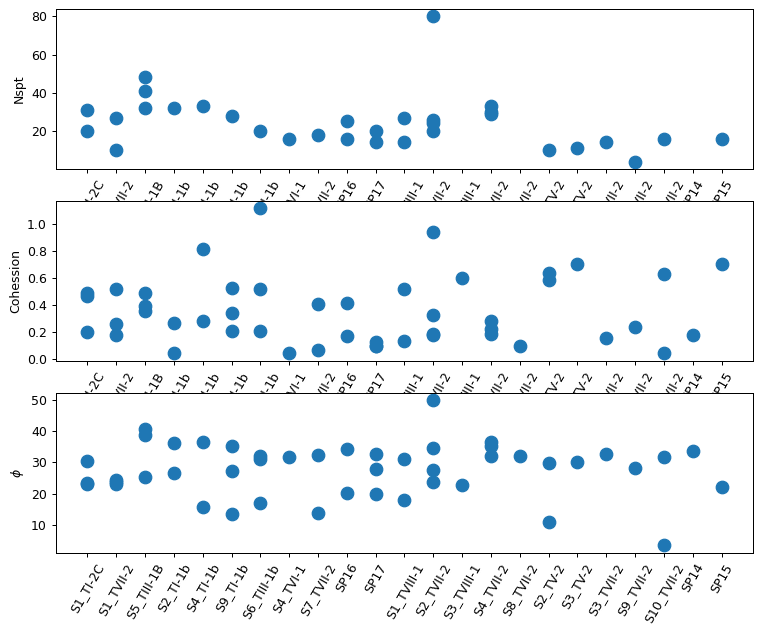

In [ ]:
fig, ax = plt.subplots(3, figsize=(10, 8),dpi= 90)
#ax[0].figure(figsize=(8,7), dpi = 100)
ax[0].scatter(dfDealP["Code"],dfDealP["Nspt"], s = 100)
ax[0].tick_params(axis='x', rotation=60)
ax[0].set_ylabel("Nspt")

ax[1].scatter(dfDealP["Code"],dfDealP["CuNew"], s = 100)
ax[1].tick_params(axis='x', rotation=60)
ax[1].set_ylabel("Cohession")

ax[2].scatter(dfDealP["Code"],dfDealP["PhiNew"], s = 100)
ax[2].tick_params(axis='x', rotation=60)
ax[2].set_ylabel("$\phi$")

## PLOT2_Visualization Scatter Plot with Cohession Vs Nspt_FilledNull

In [ ]:
fig = go.Figure(data=go.Scatter(x=dfDealP['CuNew'],
                                y=dfDealP['Nspt'],
                                mode='markers',
                                marker_color=dfDealP['Nspt'],
                                text=dfDealP['Code'])) # hover text goes here
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title='Cohession Vs Nspt with filled data',xaxis_title="Cohession",
                   yaxis_title="NSPT",
                  font=dict(
                  family="Courier New, monospace",
                  size=18,
                  color="RebeccaPurple"
                  ))
fig.show()

## PLOT3_Visualization Scatter Plot with Location Vs Nspt_FilledNull

In [ ]:
fig = go.Figure(data=go.Scatter(x=dfDealP['Code'],
                                y=dfDealP['Nspt'],
                                mode='markers',
                                marker_color=dfDealP['CuNew'],
                                text=dfDealP['Code'])) # hover text goes here
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title='Location Vs Cohession with filled data',xaxis_title="Location",
                   yaxis_title="Nspt",
                  font=dict(
                  family="Courier New, monospace",
                  size=18,
                  color="RebeccaPurple"
                  ))
fig.show()

## Dealing With Outlier

**Note:**From these reports we can see row 76 is outlier. It is located in high Depth

In [ ]:
dfDealP[dfDealP["Code"] == "S2_TVII-2"]

,Code,Soil,Density,Nspt,PhiNew,Phi,phiF,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address
73,S2_TVII-2,Clay,2.006,20.0,23.7800,23.78,32.8340,0.100,26.5,127.475,0.330,0.33,-6.011196,37.386229,Ronda Triana
74,S2_TVII-2,Sand,1.895,24.0,27.6800,27.68,33.9768,0.156,35.1,153.411,0.190,0.19,-6.011196,37.386229,Ronda Triana
75,S2_TVII-2,Sand,NaN,26.0,34.5482,NaN,34.5482,0.184,39.4,166.379,0.184,NaN,-6.011196,37.386229,Ronda Triana
76,S2_TVII-2,Sand,NaN,80.0,49.9760,NaN,49.9760,0.940,155.5,516.515,0.940,NaN,-6.011196,37.386229,Ronda Triana


## PLOT4_Visualization Scatter Plot with Firction Angle Vs Location_FilledNull

In [ ]:
fig = go.Figure(data=go.Scatter(x=dfDealP['Code'],
                                y=dfDealP['PhiNew'],
                                mode='markers',
                                marker_color=dfDealP['PhiNew'],
                                text=dfDealP['Code'])) # hover text goes here
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title='Location Vs Friction angle iwith filled data',xaxis_title="Location",
                   yaxis_title="Friction angle",
                  font=dict(
                  family="Courier New, monospace",
                  size=18,
                  color="RebeccaPurple"
                  ))
fig.show()

## PLOT5_Visualization Scatter Plot with Cohession Vs Location_Based on Cu Color_FilledNull

In [ ]:
fig = go.Figure(data=go.Scatter(x=dfDealP['Code'],
                                y=dfDealP['PhiNew'],
                                mode='markers',
                                marker_color=dfDealP['CuNew'],
                                text=dfDealP['Code'])) # hover text goes here
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title='Location Vs Friction angle with filled data and cohession color',xaxis_title="Location",
                   yaxis_title="Friction angle",
                  font=dict(
                  family="Courier New, monospace",
                  size=18,
                  color="RebeccaPurple"
                  ))
fig.show()

## PLOT6_Visualization Scatter Plot with Cohession Vs Nspt_Based on Location_FilledNull

In [ ]:
fig = go.Figure(data=go.Scatter(x=dfDealP['CuNew'],
                                y=dfDealP['Nspt'],
                                mode='markers',
                                marker_color=dfDealP['Longitude'],
                                text=dfDealP['Code'])) # hover text goes here
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title='Cohession Vs Nspt with filled data compared with Longitude',xaxis_title="Cohession",
                   yaxis_title="NSPT",
                  font=dict(
                  family="Courier New, monospace",
                  size=18,
                  color="RebeccaPurple"
                  ))
fig.show()

## PLOT7_Visualization Scatter Plot with Cohession Vs Nspt_Based on Location2_FilledNull

In [ ]:
fig = go.Figure(data=go.Scatter(x=dfDealP['CuNew'],
                                y=dfDealP['Nspt'],
                                mode='markers',
                                marker_color=dfDealP['Latitude'],
                                text=dfDealP['Code'])) # hover text goes here
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title='Cohession Vs Nspt with filled data compared with Latitude',xaxis_title="Cohession",
                   yaxis_title="NSPT",
                  font=dict(
                  family="Courier New, monospace",
                  size=18,
                  color="RebeccaPurple"
                  ))
fig.show()

# Distribution of data

### Descriptive statistics_55 Data

In [ ]:
df1.iloc[:,[4,-4,-5,-6]].describe().applymap('{:,.2f}'.format)

,Density,Nspt,Phi,Cu
count,29.00,32.00,29.00,29.00
mean,1.94,24.53,23.36,0.39
std,0.23,13.97,7.27,0.25
min,0.85,4.00,3.50,0.05
25%,1.90,16.00,20.03,0.19
50%,1.97,22.00,23.64,0.36
75%,2.02,30.25,27.80,0.52
max,2.16,80.00,33.53,1.12


### Descriptive statistics_Filled

In [ ]:
dfDealP.iloc[:,[2,3,4,-5]].describe().applymap('{:,.2f}'.format)

,Density,Nspt,PhiNew,CuNew
count,23.00,32.00,47.00,47.00
mean,1.98,24.53,27.74,0.36
std,0.08,13.97,8.54,0.25
min,1.82,4.00,3.50,0.04
25%,1.91,16.00,23.07,0.18
50%,1.98,22.00,29.98,0.28
75%,2.03,30.25,32.71,0.52
max,2.16,80.00,49.98,1.12


## Box plot for disturbation 

### Box plot for Friction Angle

#### For Filled Data

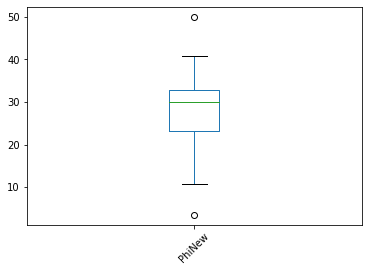

In [ ]:
boxPlotDen = dfDealP.boxplot(column=['PhiNew'], grid=False, rot=45, fontsize=10)

#### For 55 data

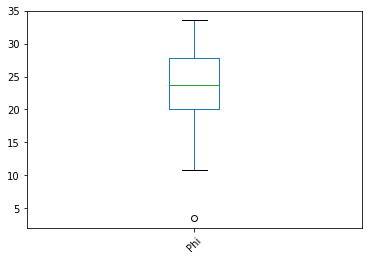

In [ ]:
boxPlotDen = df1.boxplot(column=['Phi'], grid=False, rot=45, fontsize=10)

### Box plot for Cohession

#### For 55 Data

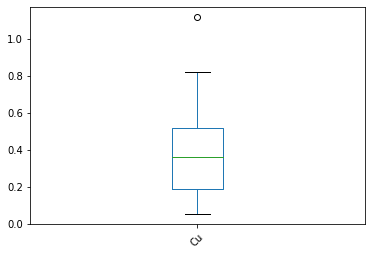

In [ ]:
boxPlotDen = df1.boxplot(column=['Cu'], grid=False, rot=45, fontsize=10)

#### For Filled Data

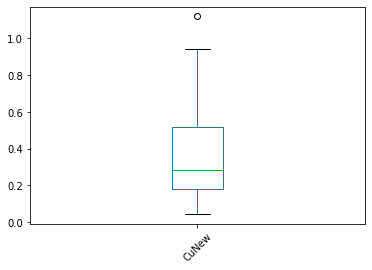

In [ ]:
boxPlotDen = dfDealP.boxplot(column=['CuNew'], grid=False, rot=45, fontsize=10)

## Scatter Plot

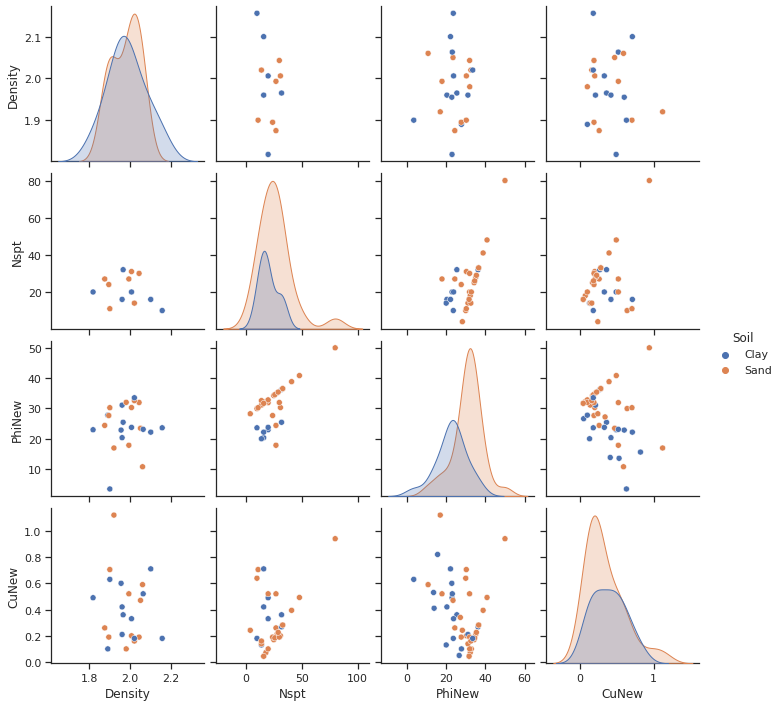

In [ ]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sb.set_theme(style="ticks", rc=custom_params)
sb.pairplot(dfDealP.iloc[:,[1,2,3,4,-5]], hue="Soil")

# save

In [ ]:
pathSave = '/content/gdrive/MyDrive/Colab Notebooks/dataAnalySPT/datasetNAFill.csv'

with open(pathSave, 'w', encoding = 'utf-8-sig') as f:
  dfDealP.to_csv(f)